# Carregamento do Dataset e Pré-Procesamento

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [28]:
dataset = load_iris()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names) # type: ignore
y = pd.Series(dataset.target) # type: ignore

selected_features = ["petal length (cm)", "petal width (cm)", "sepal width (cm)"]
X = X[selected_features]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    shuffle=True,
    random_state=25,
)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do Modelo

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9555555555555556

# Avaliação das métricas

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.95
Recall: 0.95
F1 Score: 0.95


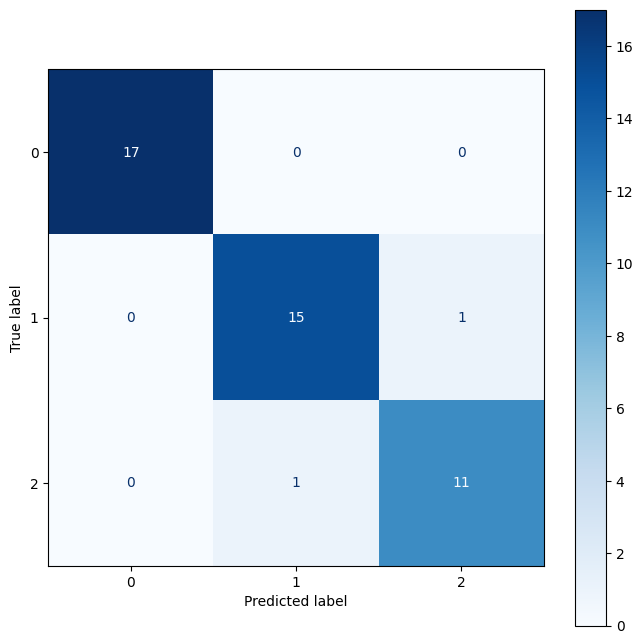

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion)

_, ax = plt.subplots(figsize=(8, 8))
cm_plot.plot(cmap="Blues", ax=ax)
plt.show()